# Sales Analysis Project

Currently experiencing a surge in business, AAL is actively pursuing expansion opportunities. To facilitate informed investment decisions, the CEO has assigned the responsibility to the Head of Sales and Marketing (S&M) at AAL. The specific tasks include:<br>
    1) Identify the states that are generating the highest revenues.<br>
    2) Develop sales programs for states with lower revenues. The Head of Sales and Marketing has requested your assistance with this task.<br>
Analyze the sales data of the company for the fourth quarter in Australia, examining it on a state-by-state basis. Provide insights to assist the company in making data-driven decisions for the upcoming year.

### Import libraries for data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('1688639662_ausapparalsales4thqrt2020.xlsx')

In [3]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [4]:
df.tail()

,Date,Time,State,Group,Unit,Sales
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500
7559,2020-12-30,Evening,TAS,Seniors,13,32500


### Data Wrangling
Check for missing or incorrect data.

In [5]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [6]:
df.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

#### Regarding null values
Since there are no null or incorrect values, we don't need to fill or remove any data. However, if there was missing/null data in any of the 4 columns the following approach can be taken for that row:
1. Date: If date property is null, that row should be dropped as it will affect the the time series aggregated data that will display earnings for that specific time period (weekly, monthly, and quarterly)
2. Time, State & Group: For categorical data such as this, we can use the mode (most commonly occuring value) of the column to fill the null.
5. Unit & Sales: for numerical values such as these, the rows can be dropped as these values staying null wont affect the aggegrated data 

#### Data formatting
We can format categorical data and convert it from objects to category so that it can be searched and indexed using with less memory.

In [7]:
df['Time'] = df['Time'].astype('category')
df['State'] = df['State'].astype('category')
df['Group'] = df['Group'].astype('category')


In [8]:
print(df['Time'].unique())
print(df['State'].unique())
print(df['Group'].unique())

[' Morning', ' Afternoon', ' Evening']
Categories (3, object): [' Afternoon', ' Evening', ' Morning']
[' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS']
Categories (7, object): [' NSW', ' NT', ' QLD', ' SA', ' TAS', ' VIC', ' WA']
[' Kids', ' Men', ' Women', ' Seniors']
Categories (4, object): [' Kids', ' Men', ' Seniors', ' Women']


In [9]:
# Need to remove tailing whitespaces to avoid indexing/searching errors.
df['Time'] = df['Time'].str.strip()
df['State'] = df['State'].str.strip()
df['Group'] = df['Group'].str.strip()

print(df['Time'].unique())
print(df['State'].unique())
print(df['Group'].unique())

['Morning' 'Afternoon' 'Evening']
['WA' 'NT' 'SA' 'VIC' 'QLD' 'NSW' 'TAS']
['Kids' 'Men' 'Women' 'Seniors']


#### Data normalization
Normalize numerical values in the dataset so we can scale them to a range of [0,1]

In [10]:
df['Norm_Sales'] = (df['Sales'] - df['Sales'].min())/(df['Sales'].max() - df['Sales'].min())
df['Norm_Unit'] = (df['Unit'] - df['Unit'].min())/(df['Unit'].max() - df['Unit'].min())
df.head()

,Date,Time,State,Group,Unit,Sales,Norm_Sales,Norm_Unit
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873


#### Regarding  the use of groupBy()
We can use groupBy() to chunk the data by categorical data such as Time, State and Group.<br>
It can also be used to merge 2 separate dataframes if they are grouped by a similar groupBy column. <br>
However I would not recommend using group by for data merging as it would be much preferable to merge data by setting a common index for both dataframes and then merging using that index as a pivot. After that you can use groupBy() combined with some aggregation functions get more meaningful information regarding the data.

### Data Analysis
Statistical Analysis using the mean, median, mode, and standard deviation for Sales and Unit.

In [11]:
# Sales
sales_mean = df['Sales'].mean()
sales_median = df['Sales'].median()
sales_mode = df['Sales'].mode()[0]  
sales_std = df['Sales'].std()

# Unit
unit_mean = df['Unit'].mean()
unit_median = df['Unit'].median()
unit_mode = df['Unit'].mode()[0]
unit_std = df['Unit'].std()

# Normalized Sales
norm_sales_mean = df['Norm_Sales'].mean()
norm_sales_median = df['Norm_Sales'].median()
norm_sales_mode = df['Norm_Sales'].mode()[0]  
norm_sales_std = df['Norm_Sales'].std()

# Normalized Unit
norm_unit_mean = df['Norm_Unit'].mean()
norm_unit_median = df['Norm_Unit'].median()
norm_unit_mode = df['Norm_Unit'].mode()[0]  
norm_unit_std = df['Norm_Unit'].std()

print("Sales - Mean:", sales_mean, " Median:", sales_median, " Mode:", sales_mode, " Standard Deviation:", sales_std)
print("Unit - Mean:", unit_mean, " Median:", unit_median, " Mode:", unit_mode, " Standard Deviation:", unit_std)

print("Normalized Sales - Mean:", norm_sales_mean, " Median:", norm_sales_median, " Mode:", norm_sales_mode, " Standard Deviation:", norm_sales_std)
print("Normalized Unit - Mean:", norm_unit_mean, " Median:", norm_unit_median, " Mode:", norm_unit_mode, " Standard Deviation:", norm_unit_std)

Sales - Mean: 45013.5582010582  Median: 35000.0  Mode: 22500  Standard Deviation: 32253.506943966317
Unit - Mean: 18.00542328042328  Median: 14.0  Mode: 9  Standard Deviation: 12.901402777586458
Normalized Sales - Mean: 0.25405433778449654  Median: 0.19047619047619047  Mode: 0.1111111111111111  Standard Deviation: 0.20478417107280086
Normalized Unit - Mean: 0.25405433778449654  Median: 0.19047619047619047  Mode: 0.1111111111111111  Standard Deviation: 0.20478417107280086


In a basic overview of the median and mode values, we can see that the modes for both Sales and Unit are less than the median, which shows that our data is skewed to the right. We can plot a histgram of the Sales and Unit data to visualize this:

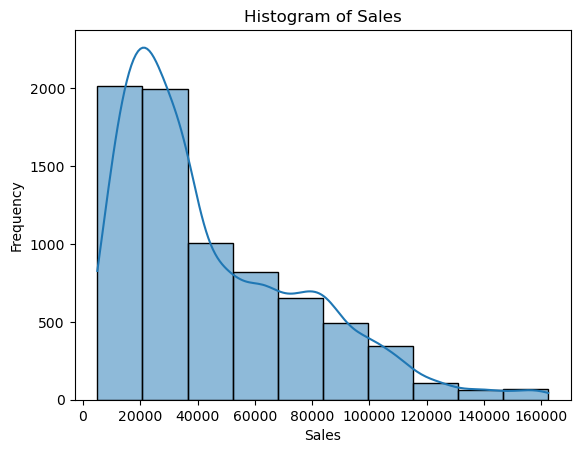

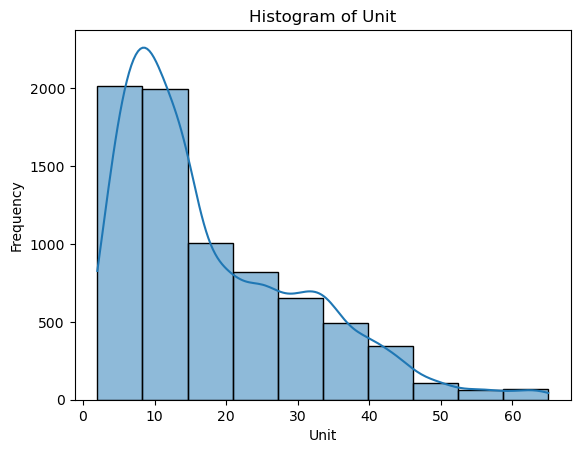

In [12]:
sns.histplot(df['Sales'], bins=10, kde=True)
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['Unit'], bins=10, kde=True)
plt.title('Histogram of Unit')
plt.xlabel('Unit')
plt.ylabel('Frequency')
plt.show()

As seen in the histogram, we can visualize the right skew caused by the difference in the median and mode. The large standard deviation values for Sales and Unit also shows the high variablity of the data which would make sense since we are grouping the Sales figures based on some categorical values and are expecting some variability in sales performance across different time periods, States.

#### Finding Sales figures based on Group
We can find this by grouping the dataframe using the 'Group' column and applying the sum() aggregate function.

In [13]:
# first drop other columns that cannot be used with the sum aggregate method
dfGroupSum = df.drop(['Date', 'Time', 'State'], axis=1)
dfGroupSum.groupby(['Group']).sum().sort_values(by='Sales', ascending=False)

,Unit,Sales,Norm_Sales,Norm_Unit
Group,,,,
Men,34300,85750000,484.444444,484.444444
Women,34177,85442500,482.492063,482.492063
Kids,34029,85072500,480.142857,480.142857
Seniors,33615,84037500,473.571429,473.571429


After taking the sum of each value of the Sales column and grouping that data based on the Group values, this shows us that Men had the highest sales followed by Women, Kids and ending with Seniors that had the lowest sales

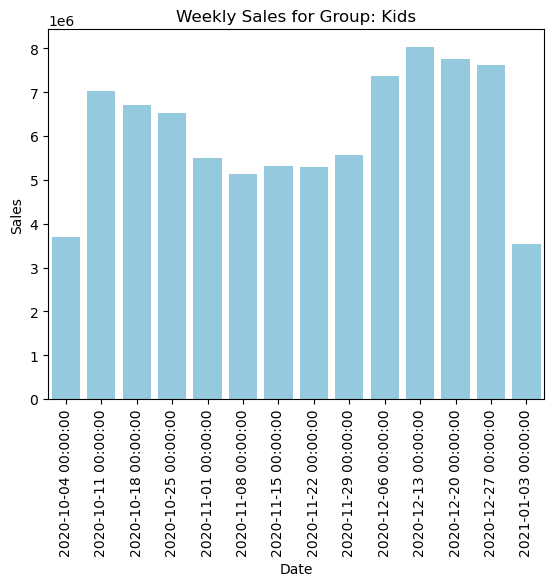

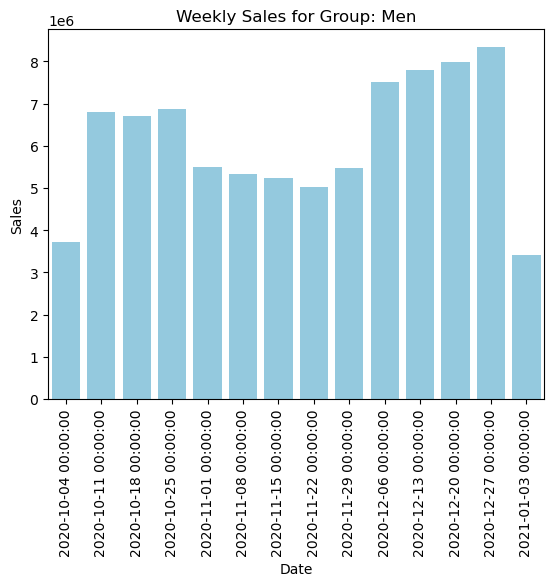

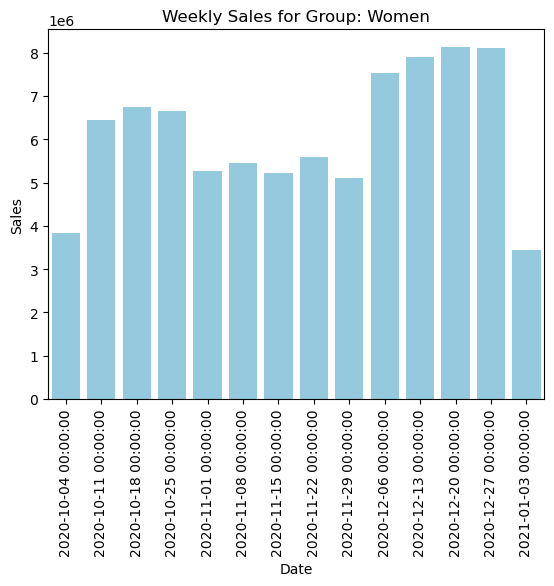

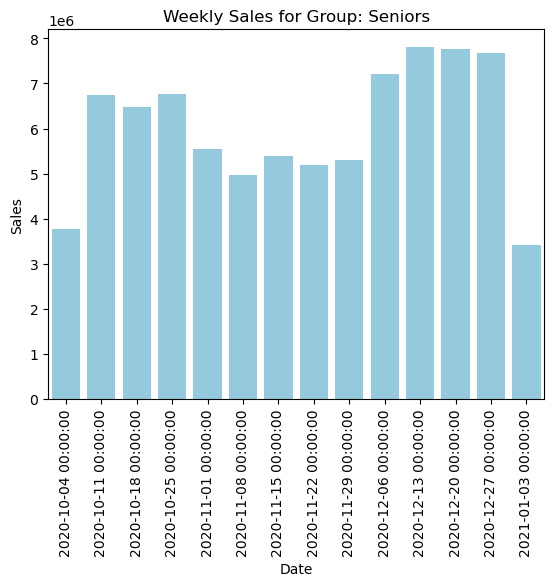

In [14]:
for group_type in df['Group'].unique():
    df_timedata_group = df[df['Group'] == group_type].drop(['Time', 'State', 'Group'], axis=1).set_index('Date')
    weekly_report = df_timedata_group.resample('W').sum()
    
    sns.barplot(x=weekly_report.index, y='Sales', data=weekly_report, color='skyblue')
    plt.title('Weekly Sales for Group: ' + group_type)
    plt.xticks(rotation=90)

    plt.show()

From the above graphs we cann see that the sales spike in the weeks of December dring the holidays for all the demographic groups.

#### Finding Sales figures based on State
We can also group the data based on State to find out which states were generating the highest and lowest sales.

In [15]:
dfStateSum = df.drop(['Date', 'Time', 'Group'], axis=1)
dfStateSum.groupby(['State']).sum().sort_values(by='Sales', ascending=False)

,Unit,Sales,Norm_Sales,Norm_Unit
State,,,,
VIC,42226,105565000,635.968254,635.968254
NSW,29988,74970000,441.714286,441.714286
SA,23543,58857500,339.412698,339.412698
QLD,13367,33417500,177.888889,177.888889
TAS,9104,22760000,110.222222,110.222222
NT,9032,22580000,109.079365,109.079365
WA,8861,22152500,106.365079,106.365079


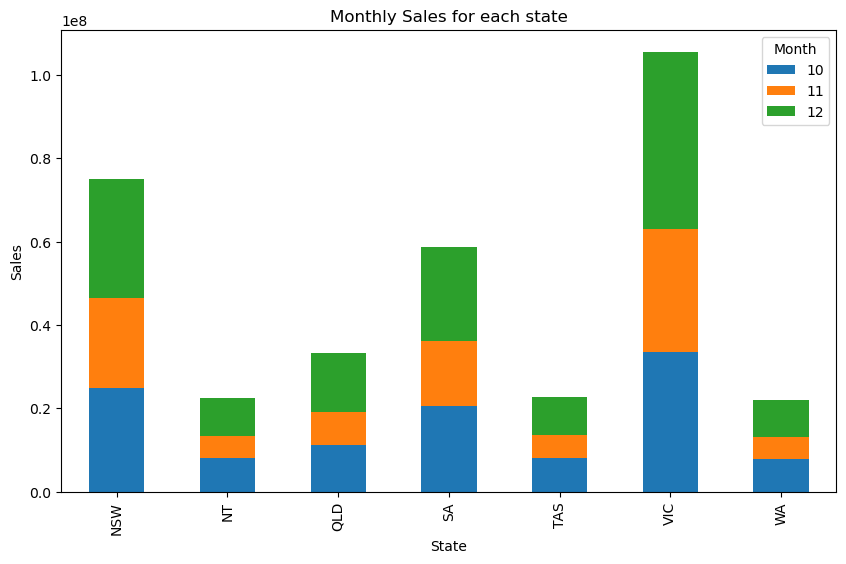

In [50]:
month_names = {10: 'October', 11: 'November', 12: 'December'}

monthly_sales_state = df.groupby(['State', df['Date'].dt.month])['Sales'].sum().unstack()
monthly_sales_state.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Monthly Sales for each state')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Month')
plt.show()

Here we can see that VIC generated the most sales in the sate sales analysis while WA had the lowest sales. Now we can examine the sales data for each of the states based on the other categorical factors. We can also see that the sales for each state seem to drop off in the month of November.

#### State-wise Sales Analysis for Different Demographic Groups (Kids, Women, Men, and Seniors).

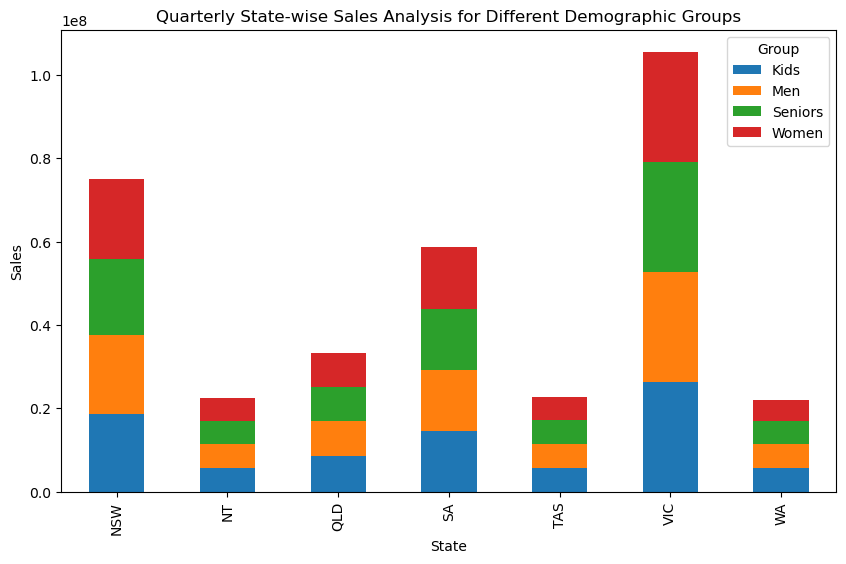

In [16]:
# Here we can use a stacked bar chart to show the sales of all the states and the distribution of those sales into the demographic groups
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().unstack()
state_group_sales.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Quarterly State-wise Sales Analysis for Different Demographic Groups')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Group')
plt.show()

For the graph above we can see that in each state there doesn't appear to be much of a difference in the sales for each demographic group. There are states where the individual group types sold more than other states but in terms of the group types, for example in the state of TAS, there was not any massive difference in the sales amount among the demographics. This pattern continues for all the other states, so we can conclude that the group type doesn't seem to affect the sales for each state.

#### Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across Various States.
Next we can analyze the sales comparison between the various states based on the demographic groups. This will lets us know which state has the most sales for a specific demographic.

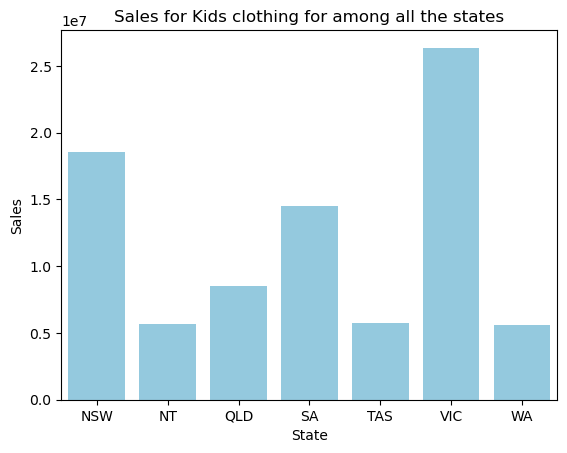

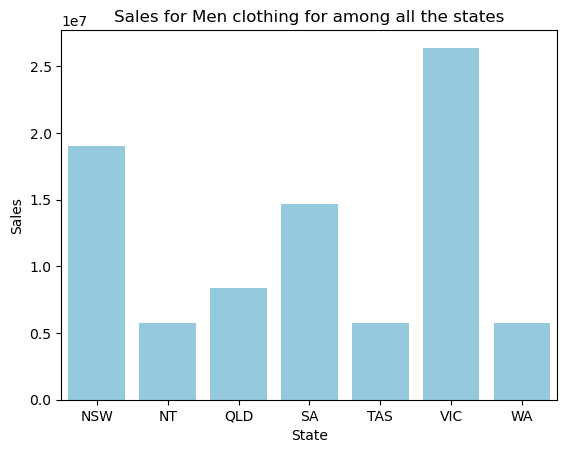

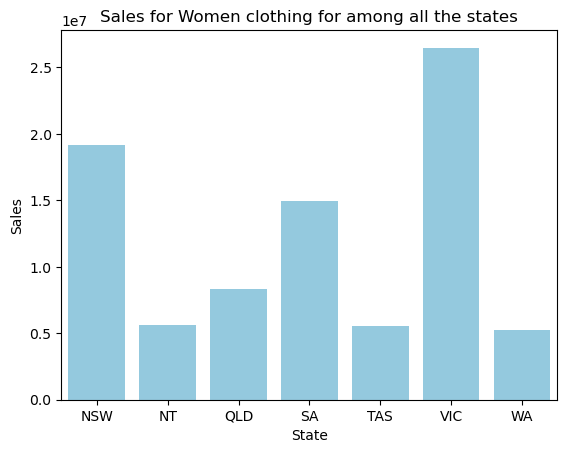

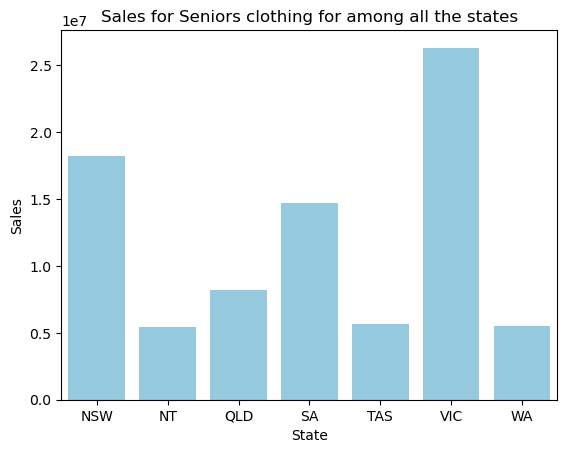

In [17]:
for group_type in df['Group'].unique():
    dfStateDemographic = df[df['Group'] == group_type].drop(['Group', 'Date', 'Time'], axis=1).groupby(['State']).sum()
    
    sns.barplot(x=dfStateDemographic.index, y='Sales', data=dfStateDemographic, color='skyblue')
    plt.title('Sales for ' + group_type + ' clothing for among all the states')

    plt.show()

From the graphs above, we can see that the states of NT, TAS and WA have lower sales in each of the demographic groups. However this is mainly due to the low total sales figures compared to the other states.

#### Time-of-the-Day Analysis
Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.

In [18]:
dfTimeSales = df.drop(['Group', 'Date', 'State'], axis=1).groupby(['Time']).sum().sort_values(by='Sales', ascending=False)
dfTimeSales.head()

,Unit,Sales,Norm_Sales,Norm_Unit
Time,,,,
Morning,45683,114207500,645.126984,645.126984
Afternoon,45603,114007500,643.857143,643.857143
Evening,44835,112087500,631.666667,631.666667


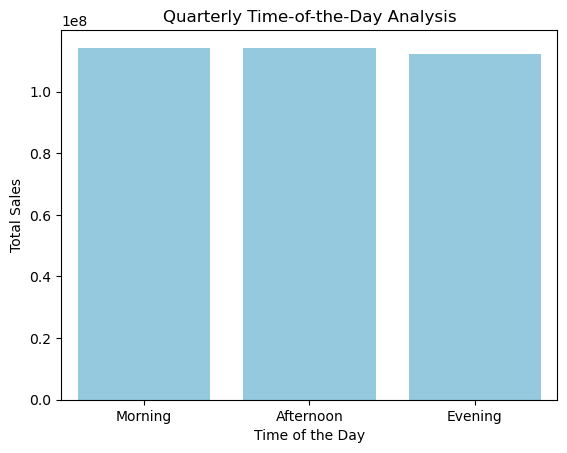

In [20]:
# Use a bar graph to show the total sales for each Time category that we need to check.
sns.barplot(x=dfTimeSales.index, y='Sales', data=dfTimeSales, color='skyblue')
plt.title('Quarterly Time-of-the-Day Analysis')
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')
plt.show()

Looking at the total sales data in the quarter for each Time category, the most sales took place in the Morning. However there isn't much of a difference in the sales between all the Time categories.

In [42]:
monthly_sales_time = df.groupby(['Time', df['Date'].dt.month])['Sales'].sum().reset_index().sort_values(by='Date')
monthly_sales_time['Date'] = pd.to_numeric(monthly_sales_time['Date'], downcast='integer')

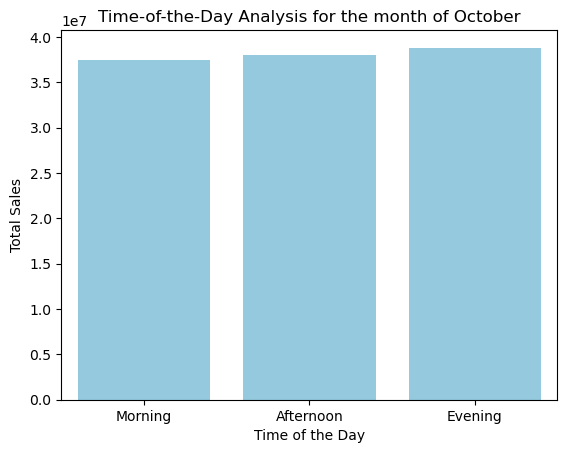

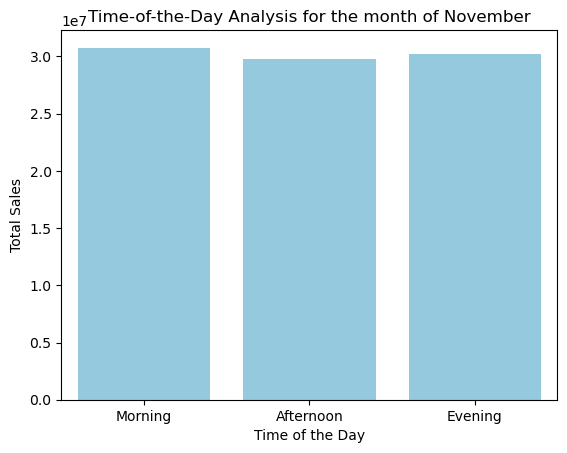

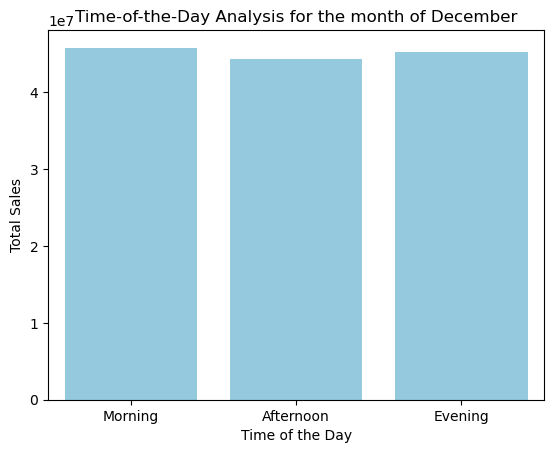

In [43]:
month_names = {10: 'October', 11: 'November', 12: 'December'}

# Use a bar graph to show the total sales for each Time category that we need to check.
for month in month_names.keys():
    current_month_sales = monthly_sales_time[monthly_sales_time['Date'] == month]
    sns.barplot(x=dfTimeSales.index, y='Sales', data=current_month_sales, color='skyblue')
    plt.title('Time-of-the-Day Analysis for the month of ' + month_names[month])
    plt.xlabel('Time of the Day')
    plt.ylabel('Total Sales')
    plt.show()

### Analysis Conclusion
From the data analysis, we can see that the states of NT, QLD, TAS and WA have the lowest sales amongst all the regions. We can also see that majority of the sales for all the demographic types occur during the holiday season in december so recommendations can be made that we can try to run some sales campaigns during mid november when sales start to drop off. 